In [9]:
library(readxl)
library(ComplexHeatmap)
library(circlize)
library(dplyr)
library(RColorBrewer)


In [2]:
# File paths
variant_matrix_file <- "results/variant_matrix.xlsx"
annotation_file <- "results/sample_annotations.xlsx"

# Load data
variant_matrix <- readxl::read_excel(variant_matrix_file)
annotations <- readxl::read_excel(annotation_file)


In [3]:
df = variant_matrix %>%
    left_join(annotations %>% select(sample_id, target), by = "sample_id")

In [4]:
na_samples <- df %>% filter(is.na(target))
if (nrow(na_samples) > 0) {
  cat("⚠️ Warning: Samples with missing target label:\n")
  print(na_samples$sample_id)
}

`use_raster` is automatically set to TRUE for a matrix with more than
2000 columns You can control `use_raster` argument by explicitly
setting TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



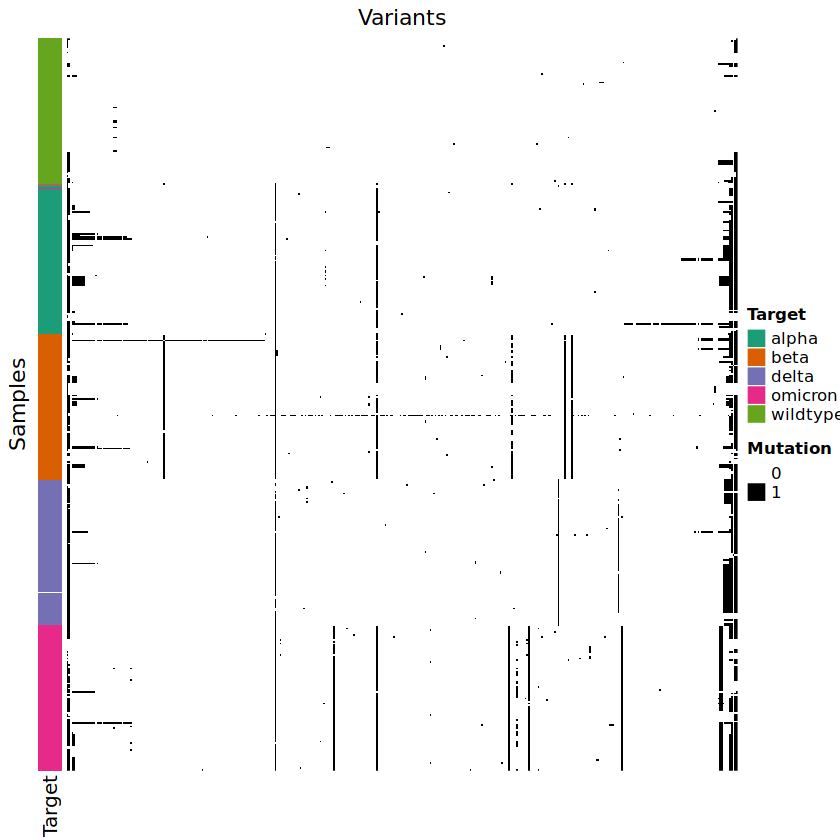

In [14]:
# Extract feature matrix and row annotations
row_annot <- df$target
names(row_annot) <- df$sample_id
feature_matrix <- df %>%
  select(-sample_id, -target) %>%
  as.matrix()
rownames(feature_matrix) <- df$sample_id

# Set binary color mapping
col_fun <- c("0" = "white", "1" = "black")

# Define color mapping for targets
target_levels <- sort(unique(row_annot))
n_colors <- length(target_levels)
target_colors <- structure(
  brewer.pal(min(n_colors, 8), "Dark2")[1:n_colors],
  names = target_levels
)

# Build row annotation
row_ha <- rowAnnotation(
  Target = row_annot,
  col = list(Target = target_colors),
  annotation_legend_param = list(title = "Target")
)

# Draw heatmap
Heatmap(feature_matrix,
        name = "Mutation",
        col = col_fun,
        show_row_names = FALSE,
        show_column_names = FALSE,
        cluster_rows = FALSE,
        cluster_columns = FALSE,
        left_annotation = row_ha,
        row_title = "Samples",
        column_title = "Variants",
        # width = unit(30, "cm")
        )